In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
path = r"C:\Users\HP\Downloads\data.csv"
df = pd.read_csv(path, dtype={0:'str'})
df.head()

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,0361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392892 entries, 0 to 392891
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fullVisitorID       392892 non-null  object 
 1   visitNumber         392892 non-null  int64  
 2   date                392892 non-null  int64  
 3   bounces             195964 non-null  float64
 4   hits                392892 non-null  int64  
 5   pageviews           392856 non-null  float64
 6   timeOnSite          196399 non-null  float64
 7   transactionRevenue  5277 non-null    float64
 8   transactions        5277 non-null    float64
 9   source              392892 non-null  object 
 10  channelGrouping     392892 non-null  object 
 11  browser             392892 non-null  object 
 12  deviceCategory      392892 non-null  object 
 13  country             392892 non-null  object 
 14  city                392892 non-null  object 
dtypes: float64(5), int64(3), object(7)

In [4]:
df[df.duplicated()]

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city


In [6]:
# Se ajuta forma de fechas.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['month'] = df['date'].dt.month

df['bounces'] = df['bounces'].fillna(0).astype(int)
df['pageviews'] = df['pageviews'].fillna(0).astype(int)
df['transactionRevenue'] = df['transactionRevenue'].fillna(0).astype(float)
df['transactions'] = df['transactions'].fillna(0).astype(float)

df['timeOnSite_m'] = (df['timeOnSite'] / 60).astype(float)
df['target'] = np.where(df['transactions'] > 0, 1, 0)

In [11]:
# Se determina rango de tiempo contemplado.
date = df['date'].dt.date
print(f"Tenemos información desde {date.min()} hasta {date.max()}.")

Tenemos información desde 2017-01-01 hasta 2017-06-30.


In [7]:
# ¿Cuántas visitas por visitor hay? 
df['fullVisitorID'].value_counts()

fullVisitorID
1957458976293878100    135
7634897085866546110    116
3148617623907142276    112
3525537916960843419    111
6018775317735347795    102
                      ... 
984901111924029842       1
1301304072885324590      1
9562006476713181017      1
4910507032070150816      1
0498654448376969495      1
Name: count, Length: 308130, dtype: int64

In [8]:
# Se observa que los visitors ya tenían datos antes.

In [9]:
df[df['fullVisitorID']=='1957458976293878100']['visitNumber'].min()

np.int64(176)

In [10]:
df[df['fullVisitorID']=='1957458976293878100']['visitNumber'].max()

np.int64(315)

In [11]:
315 - 176

139

In [12]:
# Deberían haber 139 pero hay 135 registros para ese visitor. ¿A qué se debe la pérdida de registros de visitas?

In [13]:
ver = sorted(df[df['fullVisitorID']=='1957458976293878100']['visitNumber'].to_list())

for i in range(len(ver)-1):
    if ver[i] + 1 != ver[i+1]:
        print(ver[i+1])

251
311
315


In [14]:
df[df['fullVisitorID']=='1957458976293878100'].groupby(['fullVisitorID', 'visitNumber']).size().sort_values(ascending=False)

fullVisitorID        visitNumber
1957458976293878100  176            1
                     177            1
                     178            1
                     179            1
                     180            1
                                   ..
                     308            1
                     309            1
                     311            1
                     312            1
                     315            1
Length: 135, dtype: int64

In [15]:
len(df[df['visitNumber']==1])

298788

In [ ]:
#df.fillna({'bounces': 0}, inplace=True)
#df = df.astype({'bounces': int})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392892 entries, 0 to 392891
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fullVisitorID       392892 non-null  object        
 1   visitNumber         392892 non-null  int64         
 2   date                392892 non-null  datetime64[ns]
 3   bounces             392892 non-null  int64         
 4   hits                392892 non-null  int64         
 5   pageviews           392856 non-null  float64       
 6   timeOnSite          196399 non-null  float64       
 7   transactionRevenue  5277 non-null    float64       
 8   transactions        5277 non-null    float64       
 9   source              392892 non-null  object        
 10  channelGrouping     392892 non-null  object        
 11  browser             392892 non-null  object        
 12  deviceCategory      392892 non-null  object        
 13  country             392892 no

In [17]:
df['bounces'].unique()

array([1, 0])

In [18]:
df['hits'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  28,
        29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  42,  44,
        49,  50,  53,  58,  61,  77,  80,  25,  27,  35,  47,  51,  52,
        55,  59,  63,  66,  70,  72,  89,  43,  45,  90,  64,  65,  46,
        56,  69,  87,  83,  48,  60,  62,  76,  86,  54,  57,  73,  74,
        93, 122,  67,  85, 144, 238, 445, 500,  41,  81,  91, 101, 114,
        79,  96, 107, 163,  94,  98, 103,  78,  68,  71, 100, 152, 174,
        84, 124,  88, 172, 168,  99, 116,  75,  82,  92, 156, 161,  97,
       130, 188, 237, 112, 142, 110, 106, 109, 117, 183, 227, 165, 176,
        95, 113, 145, 137, 102, 105, 108, 139, 132, 140, 143, 126, 278,
       162, 115, 201, 386, 129, 146, 209, 154, 128, 118, 125, 167, 120,
       135, 196, 158, 104, 229, 127, 138, 131, 178, 119, 303, 121, 215,
       353, 123, 483, 134, 175, 217, 111, 147, 202, 220, 150, 19

In [19]:
df['pageviews'] = df['pageviews'].fillna(0).astype(int)
df['pageviews'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  22,  23,  20,  21,  25,  24,  26,
        27,  28,  29,  36,  30,  32,  38,  35,  42,  44,  34,  45,  63,
        59,  33,  31,  40,  47,  46,  61,  39,  65,  43,  57,  55,  37,
        49,  72,   0,  41,  48,  52,  50,  67,  93,  53,  60, 101, 182,
       358, 466,  58,  54,  73,  70,  83,  69,  75,  51,  56,  74, 112,
       132,  76,  94, 129, 111,  62,  78,  68,  71, 102,  80,  66,  64,
        90, 116, 169,  81,  77, 100,  88,  97, 135, 114,  89, 400,  85,
        98,  99, 215, 154, 123, 195, 343, 118,  92, 151, 201,  82,  86,
        87, 104, 105, 110, 324,  79, 117, 146, 128, 165, 109, 197, 179,
       121, 223,  84, 108, 340, 175, 189,  91, 202, 156, 120, 167,  95,
       127,  96, 183, 107, 139, 113, 131, 133, 103, 210, 176, 138, 136])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392892 entries, 0 to 392891
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fullVisitorID       392892 non-null  object        
 1   visitNumber         392892 non-null  int64         
 2   date                392892 non-null  datetime64[ns]
 3   bounces             392892 non-null  int64         
 4   hits                392892 non-null  int64         
 5   pageviews           392892 non-null  int64         
 6   timeOnSite          196399 non-null  float64       
 7   transactionRevenue  5277 non-null    float64       
 8   transactions        5277 non-null    float64       
 9   source              392892 non-null  object        
 10  channelGrouping     392892 non-null  object        
 11  browser             392892 non-null  object        
 12  deviceCategory      392892 non-null  object        
 13  country             392892 no

In [21]:
df['timeOnSite'] = df['timeOnSite'].fillna(0).astype(int)
df['timeOnSite'].unique()

array([    0,    32,    18, ...,  2524, 12136,  4195], shape=(3500,))

In [ ]:
df['timeOnSite_m'] = (df['timeOnSite'] / 60).astype(float)
df['timeOnSite_h'].unique()

array([0.        , 0.00888889, 0.005     , ..., 0.70111111, 3.37111111,
       1.16527778], shape=(3500,))

In [23]:
df['timeOnSite'].max()

np.int64(12136)

In [24]:
df['timeOnSite_h'].max()

np.float64(3.371111111111111)

<Axes: >

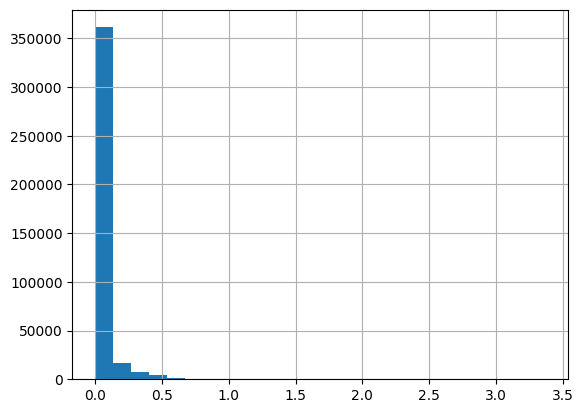

In [25]:
df['timeOnSite_h'].hist(bins=25)

In [26]:
df['transactionRevenue'] = df['transactionRevenue'].fillna(0).astype(float)
df['transactions'] = df['transactions'].fillna(0).astype(float)

In [27]:
df['source'].unique()

array(['(direct)', 'bing', 'siliconvalley.about.com', 'baidu',
       'int.search.tb.ask.com', 'qiita.com', 'cv.il3.ub.edu', 'Partners',
       'analytics.google.com', 'dfa', 'google.co.jp', 'sashihara.jp',
       'mail.google.com', 'online-metrics.com', 'optimize.google.com',
       'search.mysearch.com', 'search.xfinity.com',
       'productforums.google.com', 'sites.google.com', 'google.fr',
       'google.com', 'blog.golang.org', 'images.google.de',
       'wheretoget.it', 'yahoo', 'duckduckgo.com', 'youtube.com',
       'plus.google.com', 'quora.com', 'reddit.com', 'l.facebook.com',
       'facebook.com', 'm.facebook.com', 'search.tb.ask.com',
       'm.youtube.com', 'outlook.live.com', 't.co',
       'myactivity.google.com', 'phandroid.com', 'support.google.com',
       'google.co.uk', 'ask', 'l.messenger.com', 'adwords.google.com',
       'dealspotr.com', 'google', 'groups.google.com', 'google.co.in',
       'learn.colorado.edu', 'googleads.g.doubleclick.net',
       'hk.search.

In [28]:
def source_groups(x):
    x = str(x).lower()
    if x in ['(direct)', '(not set)']:
        return 'Direct'
    elif 'google' in x:
        return 'Google'
    elif 'bing' in x:
        return 'Bing'
    elif 'yahoo' in x:
        return 'Yahoo'
    elif 'baidu' in x:
        return 'Baidu'
    elif 'ask' in x:
        return 'Ask'
    elif 'duckduckgo' in x:
        return 'DuckDuckGo'
    elif 'facebook' in x:
        return 'Facebook'
    elif 'twitter.com' in x or 't.co' in x:
        return 'Twitter'
    elif 'reddit' in x:
        return 'Reddit'
    elif 'linkedin' in x:
        return 'LinkedIn'
    elif 'pinterest' in x:
        return 'Pinterest'
    elif 'youtube' in x:
        return 'YouTube'
    elif 'mail' in x or 'outlook' in x or 'aol' in x or 'verizon' in x:
        return 'Email'
    elif any(s in x for s in ['edu', 'learn.', 'blackboard', 'collaborate']):
        return 'Educación'
    elif 'yandex' in x or 'sm.cn' in x or 'so.com' in x or 'sogou' in x:
        return 'Otros buscadores'
    elif 'businessinsider' in x or 'forbes' in x or 'marketingland' in x:
        return 'Noticias / Negocios'
    else:
        return 'Otros'

# Suponiendo que tu columna se llama 'source'
df['source_grouped'] = df['source'].apply(source_groups)
df['source_grouped'].unique()


array(['Direct', 'Bing', 'Twitter', 'Baidu', 'Ask', 'Otros', 'Educación',
       'Google', 'Yahoo', 'DuckDuckGo', 'YouTube', 'Facebook', 'Email',
       'Noticias / Negocios', 'LinkedIn', 'Otros buscadores'],
      dtype=object)

In [29]:
df['source_grouped'].value_counts()

source_grouped
Direct                 167455
Google                 157232
YouTube                 43921
Otros                   13516
Facebook                 3770
Twitter                  3233
Yahoo                    1071
Baidu                    1017
Bing                      974
Ask                       240
DuckDuckGo                166
Otros buscadores           90
Noticias / Negocios        86
Educación                  68
Email                      42
LinkedIn                   11
Name: count, dtype: int64

In [30]:
df['channelGrouping'].unique()

array(['Organic Search', 'Direct', 'Referral', 'Paid Search',
       'Affiliates', 'Display', 'Social', '(Other)'], dtype=object)

In [31]:
df['browser'].unique()

array(['Chrome', 'Edge', 'Internet Explorer', 'Firefox', 'Safari',
       'Android Webview', 'UC Browser', 'Opera Mini', 'YaBrowser',
       'Safari (in-app)', 'BlackBerry', 'Opera', 'Nintendo Browser',
       'Maxthon', 'Puffin', 'Coc Coc', 'Amazon Silk', 'Apple-iPhone7C2',
       'MRCHROME', 'Android Browser', 'Nokia Browser',
       'Mozilla Compatible Agent', 'SeaMonkey', 'LYF_LS_4002_12',
       'CSM Click', 'Iron', 'Mozilla', 'Seznam', 'osee2unifiedRelease',
       'Changa 99695759', 'subjectAgent: NoticiasBoom', 'M5',
       'Android Runtime', 'DASH_JR_3G', 'IE with Chrome Frame', 'DoCoMo',
       'YE', '(not set)', 'Reddit'], dtype=object)

In [32]:
df['browser'].value_counts()

browser
Chrome                        279456
Safari                         61638
Firefox                        17834
Internet Explorer               9513
Android Webview                 6225
Edge                            4976
Safari (in-app)                 4199
Opera Mini                      3075
Opera                           2037
UC Browser                      1390
YaBrowser                        965
Coc Coc                          346
Amazon Silk                      274
Android Browser                  249
Mozilla Compatible Agent         197
Maxthon                          112
MRCHROME                          89
BlackBerry                        80
Puffin                            80
Nintendo Browser                  65
Nokia Browser                     34
Seznam                            10
LYF_LS_4002_12                     8
SeaMonkey                          7
Apple-iPhone7C2                    6
Mozilla                            6
Iron                          

In [33]:
df['deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [34]:
df['country'].unique()

array(['Australia', 'Turkey', 'Russia', 'United States', 'Indonesia',
       'India', 'Spain', 'United Kingdom', 'Netherlands', 'Algeria',
       'Singapore', 'Switzerland', 'Japan', 'Canada', 'Colombia',
       'Mexico', 'China', 'France', 'Germany', 'Poland', 'Italy',
       'Israel', 'Greece', 'Sri Lanka', 'Sweden', 'Taiwan', 'Serbia',
       'Hong Kong', 'Côte d’Ivoire', 'Egypt', 'Philippines', 'Hungary',
       'Portugal', 'Belgium', 'Thailand', 'Kosovo', 'Ukraine',
       'Bangladesh', 'Romania', 'South Africa', 'United Arab Emirates',
       'Jersey', 'South Korea', 'Malaysia', 'Pakistan', 'Brazil',
       'Czechia', 'Ireland', 'Dominican Republic', 'Vietnam',
       'New Zealand', 'Austria', 'Denmark', 'Qatar', 'Estonia', 'Albania',
       'Kuwait', 'Bulgaria', 'Guatemala', 'Cyprus', 'Slovakia',
       '(not set)', 'Macedonia (FYROM)', 'Nigeria', 'Uruguay', 'Morocco',
       'Saudi Arabia', 'Latvia', 'Venezuela', 'Georgia', 'Oman',
       'Finland', 'Costa Rica', 'Cameroon', 'P

In [35]:
df['city'].unique()

array(['Sydney', 'Istanbul', 'Moscow', 'not available in demo dataset',
       '(not set)', 'Singapore', 'Minato', 'Hyderabad', 'Jakarta',
       'Mountain View', 'Melbourne', 'Tel Aviv-Yafo', 'Mumbai', 'Chicago',
       'Chennai', 'Los Angeles', 'London', 'Santa Clara', 'Hong Kong',
       'Fremont', 'Berlin', 'San Francisco', 'Bangkok', 'New York',
       'Montreal', 'Toronto', 'Boston', 'Houston', 'San Jose',
       'Bengaluru', 'Seoul', 'Austin', 'Sunnyvale', 'Mexico City',
       'Colombo', 'Thessaloniki', 'Madrid', 'Ashburn', 'Dublin', 'Paris',
       'Bogota', 'Ahmedabad', 'New Delhi', 'Barranquilla', 'Palo Alto',
       'Calgary', 'Bilbao', 'Warsaw', 'Jaipur', 'Phoenix', 'Kolkata',
       'Ho Chi Minh City', 'Dallas', 'Atlanta', 'Detroit', 'Seattle',
       'Redmond', 'Santiago', 'Jersey City', 'Riyadh', 'Ann Arbor',
       'Kuala Lumpur', 'Pune', 'Prague', 'Cupertino', 'Milpitas', 'Rome',
       'Washington', 'Brisbane', 'Sao Paulo', 'Beijing', 'Adelaide',
       'Osaka', 'Por

In [36]:
df['month'] = df['date'].dt.month

In [37]:
df.columns

Index(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews',
       'timeOnSite', 'transactionRevenue', 'transactions', 'source',
       'channelGrouping', 'browser', 'deviceCategory', 'country', 'city',
       'timeOnSite_h', 'source_grouped', 'month'],
      dtype='object')

<Axes: xlabel='month'>

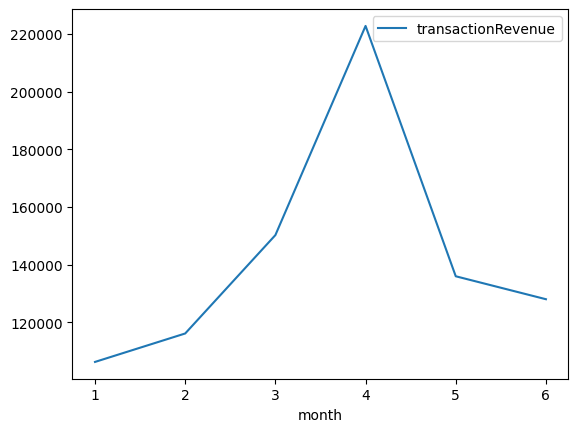

In [38]:
df.groupby(['month']).agg({'transactionRevenue':'sum'}).plot()

In [39]:
df.columns

Index(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews',
       'timeOnSite', 'transactionRevenue', 'transactions', 'source',
       'channelGrouping', 'browser', 'deviceCategory', 'country', 'city',
       'timeOnSite_h', 'source_grouped', 'month'],
      dtype='object')

In [42]:
df['bounces'].value_counts()

bounces
0    196928
1    195964
Name: count, dtype: int64

In [44]:
df.groupby('bounces').agg({'transactionRevenue':'sum'})

,transactionRevenue
bounces,
0,859297.27
1,0.00


In [50]:
df[df['bounces']==0].shape[0]

196928

In [51]:
df[(df['bounces']==0)&(df['transactionRevenue']==0)].shape[0]

191651

In [55]:
df[df['transactionRevenue']>0].shape[0]

5277

In [54]:
df[df['transactions']>0].shape[0]

5277

In [59]:
df[df['transactions']>0]['hits'].describe()

count    5277.000000
mean       32.391700
std        25.730213
min         2.000000
25%        18.000000
50%        26.000000
75%        39.000000
max       500.000000
Name: hits, dtype: float64

In [63]:
df[df['transactions']==0]['hits'].describe()

count    387615.000000
mean          4.033177
std           7.373788
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         500.000000
Name: hits, dtype: float64

In [64]:
df[df['transactions']>0]['pageviews'].describe()

count    5277.000000
mean       25.693386
std        18.873416
min         2.000000
25%        15.000000
50%        21.000000
75%        31.000000
max       466.000000
Name: pageviews, dtype: float64

In [65]:
df[df['transactions']==0]['pageviews'].describe()

count    387615.000000
mean          3.472213
std           5.498020
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         340.000000
Name: pageviews, dtype: float64

In [75]:
df[(df['transactions']>0)]['timeOnSite_h'].describe()

count    5277.000000
mean        0.279967
std         0.243866
min         0.000000
25%         0.122222
50%         0.207500
75%         0.359167
max         3.371111
Name: timeOnSite_h, dtype: float64

In [70]:
df[df['transactions']==0]['timeOnSite_h'].describe()

count    387615.000000
mean          0.035152
std           0.095443
min           0.000000
25%           0.000000
50%           0.000000
75%           0.024167
max           3.291111
Name: timeOnSite_h, dtype: float64

In [82]:
df[(df['transactions']>0)]['country'].value_counts()

country
United States           5042
Canada                    80
Taiwan                    11
Japan                     11
Venezuela                  9
Mexico                     8
Australia                  7
Brazil                     6
Singapore                  6
Belgium                    5
India                      5
Colombia                   5
Puerto Rico                5
South Korea                5
Switzerland                5
Germany                    4
Hong Kong                  4
United Kingdom             4
Ukraine                    4
Ireland                    4
United Arab Emirates       3
Russia                     3
Indonesia                  3
Guatemala                  2
Spain                      2
Greece                     2
France                     2
Israel                     2
Argentina                  2
Poland                     2
Ecuador                    2
Sweden                     2
Kuwait                     2
China                      2
Saudi 

In [83]:
df[df['transactions']==0]['country'].value_counts()

country
United States       167182
India                24356
United Kingdom       19270
Canada               12228
Germany              10463
                     ...  
Eritrea                  1
Comoros                  1
Marshall Islands         1
Åland Islands            1
St. Barthélemy           1
Name: count, Length: 212, dtype: int64

In [18]:
df[df['transactions']>0]['channelGrouping'].value_counts()

channelGrouping
Referral          2306
Organic Search    1590
Direct            1049
Paid Search        194
Social              71
Display             64
Affiliates           2
(Other)              1
Name: count, dtype: int64

In [17]:
df[df['transactions']==0]['channelGrouping'].value_counts()

channelGrouping
Organic Search    193844
Direct             72674
Social             52103
Referral           46571
Paid Search        11881
Affiliates          7919
Display             2511
(Other)              112
Name: count, dtype: int64

In [12]:
df.columns

Index(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews',
       'timeOnSite', 'transactionRevenue', 'transactions', 'source',
       'channelGrouping', 'browser', 'deviceCategory', 'country', 'city',
       'month'],
      dtype='object')

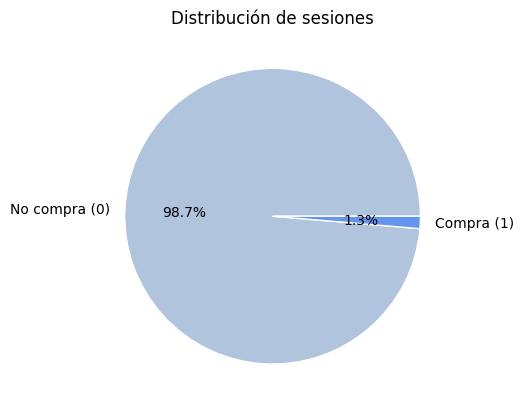

In [35]:
df['target'].value_counts(normalize=True).plot.pie(labels=['No compra (0)', 'Compra (1)'], autopct='%.1f%%', colors = ['lightsteelblue', 'cornflowerblue'], wedgeprops={'edgecolor': 'white'}, ylabel='', title='Distribución de sesiones');

In [16]:
df.columns

Index(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews',
       'timeOnSite', 'transactionRevenue', 'transactions', 'source',
       'channelGrouping', 'browser', 'deviceCategory', 'country', 'city',
       'month', 'timeOnSite_m', 'target'],
      dtype='object')

In [15]:
def top3(series):
    return series.value_counts().head(3).index.tolist()

summary = df.groupby('target').agg({
    'visitNumber': ['mean', 'median'],
    'bounces': ['median'],
    'hits': ['mean', 'median'],
    'pageviews': ['mean', 'median'],
    'timeOnSite_m': ['mean', 'median'],
    'channelGrouping': top3,
    'browser': top3,
    'deviceCategory': top3,
    'country': top3
})

# Aplanar columnas
summary.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in summary.columns]
summary.reset_index()


,target,visitNumber_mean,visitNumber_median,bounces_median,hits_mean,hits_median,pageviews_mean,pageviews_median,timeOnSite_m_mean,timeOnSite_m_median,channelGrouping_top3,browser_top3,deviceCategory_top3,country_top3
0,0,2.328886,1.0,1.0,4.033177,1.0,3.472213,1.0,4.277520,1.483333,"[Organic Search, Direct, Social]","[Chrome, Safari, Firefox]","[desktop, mobile, tablet]","[United States, India, United Kingdom]"
1,1,4.734698,2.0,0.0,32.391700,26.0,25.693386,21.0,16.801188,12.450000,"[Referral, Organic Search, Direct]","[Chrome, Safari, Firefox]","[desktop, mobile, tablet]","[United States, Canada, Taiwan]"


In [11]:
df[df['target']==1].groupby('bounces').size()

bounces
0    5277
dtype: int64

In [24]:
df.columns

Index(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews',
       'timeOnSite', 'transactionRevenue', 'transactions', 'source',
       'channelGrouping', 'browser', 'deviceCategory', 'country', 'city',
       'month', 'timeOnSite_m', 'target'],
      dtype='object')

In [4]:
# Se ajuta forma de fechas.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['month'] = df['date'].dt.month

df['bounces'] = df['bounces'].fillna(0).astype(int)
df['pageviews'] = df['pageviews'].fillna(0).astype(int)
df['transactionRevenue'] = df['transactionRevenue'].fillna(0).astype(float)
df['transactions'] = df['transactions'].fillna(0).astype(float)
df['timeOnSite'] = df['timeOnSite'].fillna(0).astype(float)

df['timeOnSite_m'] = (df['timeOnSite'] / 60).astype(float)
df['target'] = np.where(df['transactions'] > 0, 1, 0)

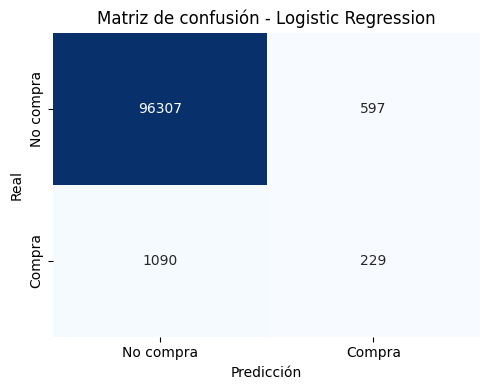

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Asegurate de tener cargado tu DataFrame original como df

# Selección de features
features = ['visitNumber', 'bounces', 'hits', 'timeOnSite', 'pageviews']
X = df[features]
y = df['target']

# Preprocesamiento (aunque no es esencial para RandomForest)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.columns)
])

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Pipeline con RandomForest
pipe_rf = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Entrenar modelo
pipe_rf.fit(X_train, y_train)

# Predicciones
y_pred = pipe_rf.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No compra', 'Compra'],
            yticklabels=['No compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Logistic Regression')
plt.tight_layout()
plt.show()

# # Obtener probabilidades de clase 1
# y_prob_rf = pipe_rf.predict_proba(X_test)[:, 1]

# # Crear tabla con índice del usuario y probabilidad
# df_rf_scores = pd.DataFrame({
#     'user_index': X_test.index,
#     'probabilidad_de_compra': y_prob_rf
# })

# # Top 10 usuarios más probables
# top10 = df_rf_scores.sort_values('probabilidad_de_compra', ascending=False).head(10)
# print(top10)

In [8]:
y_pred1 = pipe_rf.predict(X_train)
confusion_matrix(y_train, y_pred1)

array([[290451,    260],
       [     2,   3956]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de features numéricas
features = ['visitNumber', 'bounces', 'hits', 'timeOnSite', 'pageviews']
X = df[features]
y = df['target']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

# Paso 1: preprocesamiento con splines
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.columns)
])

# Paso 2: pipeline completo con kernel + regresión logística
pipe_nonlinear_lr = Pipeline([
    ('preprocess', preprocessor),
    ('PolynomialFeatures', PolynomialFeatures(degree=3, include_bias=False)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Entrenar modelo
pipe_nonlinear_lr.fit(X_train, y_train)

# Predicción
y_pred = pipe_nonlinear_lr.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No compra', 'Compra'],
            yticklabels=['No compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Logistic Regression (Spline + Kernel)')
plt.tight_layout()
plt.show()

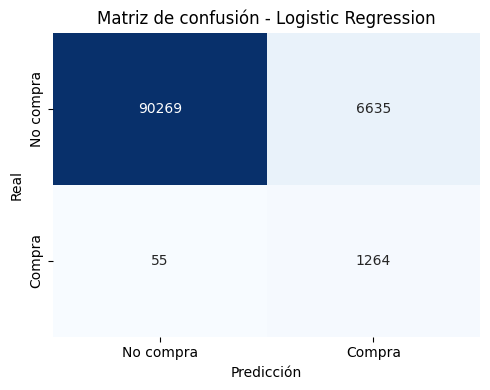

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Selección de features
features = [
    'visitNumber', 'bounces', 'hits','timeOnSite', 'pageviews'
]
X = df[features]
y = df['target']

# Definición del preprocesador (solo escalado en este caso)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.columns)
])

# División en train y test para obtener matriz de confusión
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Pipeline con Logistic Regression
pipe_lr = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Entrenar modelo
pipe_lr.fit(X_train, y_train)

# Predicciones
y_pred = pipe_lr.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No compra', 'Compra'],
            yticklabels=['No compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Logistic Regression')
plt.tight_layout()
plt.show()

In [26]:
# Extraer modelo entrenado y scaler
model = pipe_lr.named_steps['clf']
scaler = pipe_lr.named_steps['preprocess'].named_transformers_['num']

# Obtener nombres de features
feature_names = preprocessor.transformers_[0][2]  # columnas originales

# Coeficientes
coefs = model.coef_[0]

# Armar tabla
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs
}).sort_values('coef', key=abs, ascending=False)


In [27]:
coef_df

,feature,coef
4,pageviews,3.461004
1,bounces,-2.739699
2,hits,-1.404368
0,visitNumber,0.126085
3,timeOnSite,-0.048339


In [22]:
y_prob = pipe_lr.predict_proba(X_test)[:, 1]

In [23]:
y_prob

array([0.05559923, 0.00016898, 0.07900087, ..., 0.00016898, 0.00016898,
       0.05558546], shape=(98223,))

In [21]:
y_prob = pipe_lr.predict_proba(X_test)[:, 1]  # probabilidad de clase 1 (compra)
y_pred_thresh = (y_prob >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh, digits=3))

[[90269  6635]
 [   55  1264]]
              precision    recall  f1-score   support

           0      0.999     0.932     0.964     96904
           1      0.160     0.958     0.274      1319

    accuracy                          0.932     98223
   macro avg      0.580     0.945     0.619     98223
weighted avg      0.988     0.932     0.955     98223



In [16]:
from sklearn.metrics import f1_score
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_prob >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

In [17]:
best_threshold

np.float64(0.9494949494949496)

In [12]:
55+1264

1319

In [10]:
y_train.value_counts()

target
0    290711
1      3958
Name: count, dtype: int64

In [11]:
y_test.value_counts()

target
0    96904
1     1319
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1 score en validación cruzada:", grid_search.best_score_)

KeyboardInterrupt: 

In [36]:
X.describe()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,visitNumber,bounces,hits,avg_time_per_page
count,392892.000000,392892.000000,392892.000000,392869.0
mean,2.361198,0.498773,4.414065,inf
std,10.158865,0.499999,8.555069,NaN
min,1.000000,0.000000,1.000000,0.0
25%,1.000000,0.000000,1.000000,0.0
50%,1.000000,0.000000,2.000000,0.0
75%,1.000000,1.000000,4.000000,20.5
max,389.000000,1.000000,500.000000,inf


In [31]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer
from sklearn.compose import ColumnTransformer

# Selección de features
features = [
    'visitNumber', 'bounces', 'hits','avg_time_per_page'
]
X = df[features]
y = df['target']

# Definición del preprocesador (solo escalado en este caso)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.columns)
])

# Modelos a comparar
models = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Métricas personalizadas
scoring = {
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluación de modelos
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('clf', model)
    ])
    scores = cross_validate(pipe, X, y, cv=cv, scoring=scoring)
    results[name] = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}

pd.DataFrame(results).T

,roc_auc,f1,precision,recall
LogisticRegression,0.973240,0.249861,0.143749,0.954329
RandomForest,0.882173,0.200372,0.221201,0.183249
